In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('menu.csv')

data.head()



,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

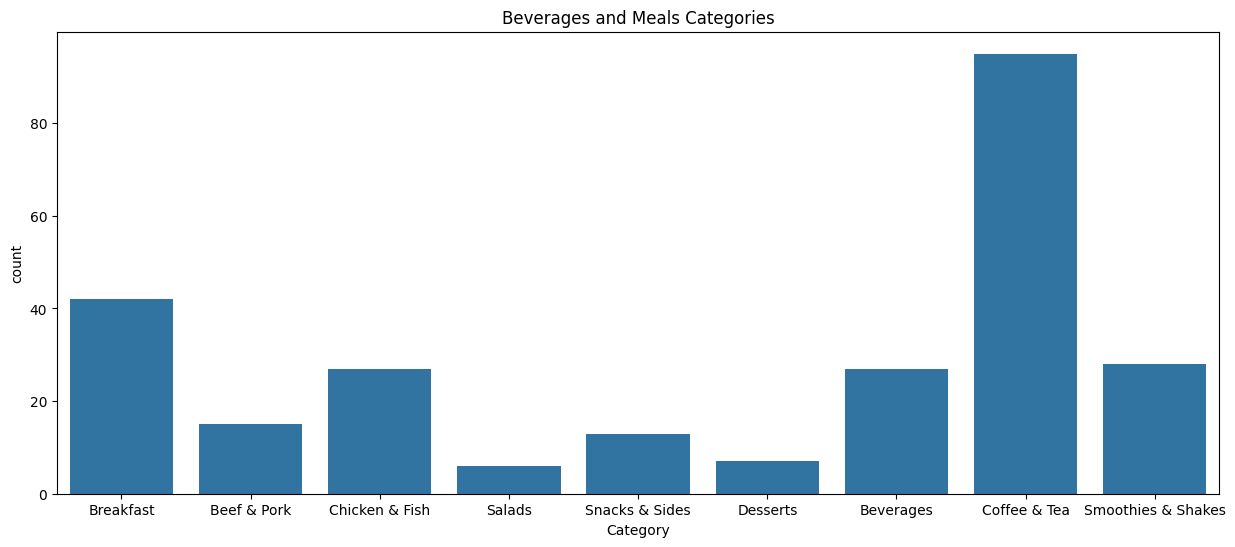

In [7]:
plt.figure(figsize=(15, 6))
sns.countplot(x=data['Category'])
plt.title('Beverages and Meals Categories')
plt.show()

# plt.figure(figsize=(15, 6))
# sns.countplot(x=data['Item'])
# plt.title(f'Box Plot of {i}')
# plt.show()

In [8]:
# Cek apakah ada missing values

missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

a. How many calories does the average McDonald's value meal contain

In [9]:
# Memisahkan data menjadi beberapa kategori

breakfast = data.loc[data.Category == "Breakfast"]
beef_pork = data.loc[data.Category == "Beef & Pork"]
chicken_fish = data.loc[data.Category == "Chicken & Fish"]
salad = data.loc[data.Category == "Salads"]
snack_sides = data.loc[data.Category == "Snacks & Sides"]
dessert = data.loc[data.Category == "Desserts"]

# Membuat rata-rata setiap Meal

avg = [round(breakfast['Calories'].mean(axis=0), 2), round(beef_pork['Calories'].mean(axis=0), 2), round(chicken_fish['Calories'].mean(axis=0), 2),
       round(salad['Calories'].mean(axis=0), 2), round(snack_sides['Calories'].mean(axis=0), 2),  round(dessert['Calories'].mean(axis=0), 2)]

index = ['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides Category', 'Dessert']
avg_calories = pd.DataFrame({'Average Calories': avg}, index=index).sort_values(by='Average Calories', ascending=False)

print(avg_calories)

                         Average Calories
Chicken & Fish                     552.96
Breakfast                          526.67
Beef & Pork                        494.00
Salads                             270.00
Snacks & Sides Category            245.77
Dessert                            222.14


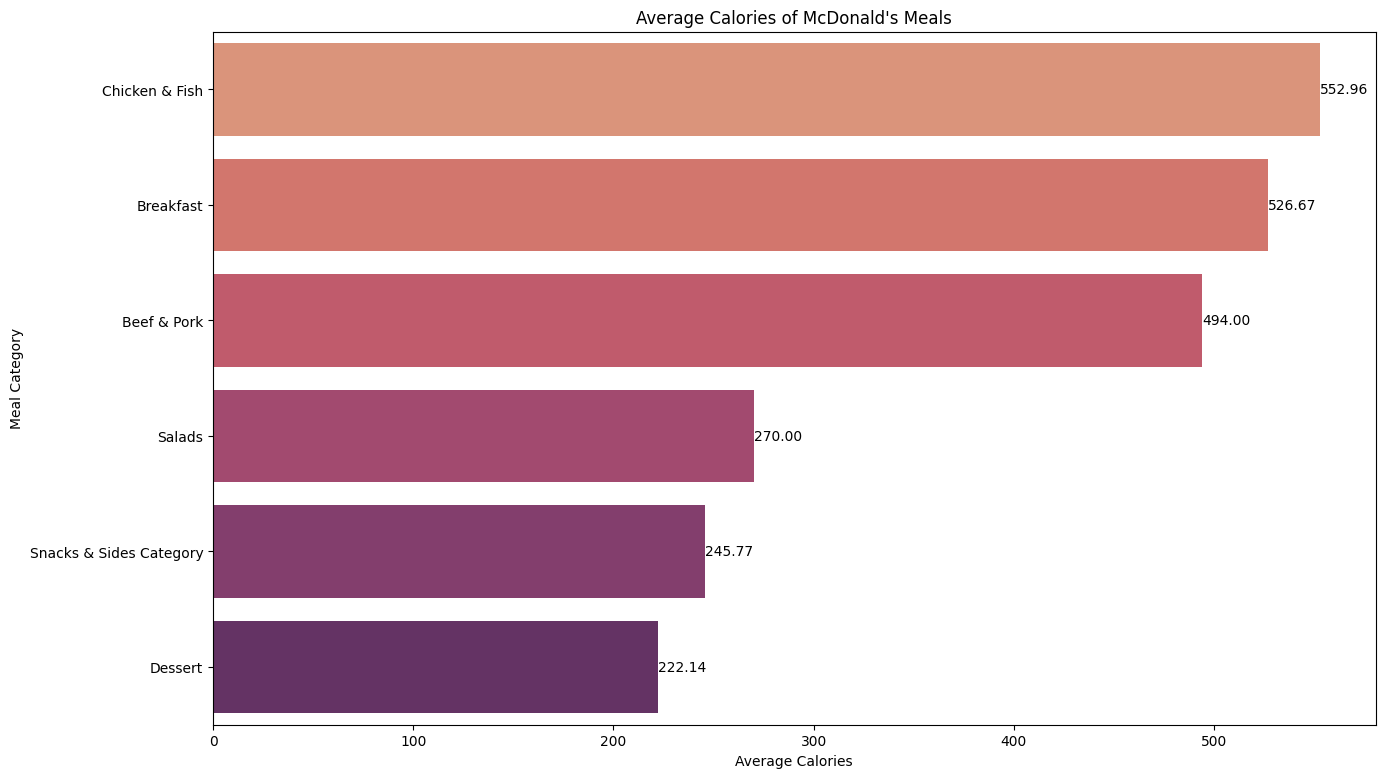

In [10]:
# Visualisasikan datanya
plt.figure(figsize=(15, 9))

ax = sns.barplot(x=avg_calories['Average Calories'], y=avg_calories.index, hue=avg_calories.index, data=avg_calories, palette='flare')

for i in ax.containers:
    ax.bar_label(i, fmt="%.2f", label_type='edge')

plt.title("Average Calories of McDonald's Meals")
plt.xlabel("Average Calories")
plt.ylabel("Meal Category")
plt.show()

b. How much do beverages, like soda or coffee, contribute to the overall caloric intake?

In [11]:
# Mendata Seluruh Item Berdasarkan Kategori untuk membuat Contribute Caloriesnya

beverage_categories = data[data['Category'].isin(['Beverages', 'Coffee & Tea', 'Smoothies & Shakes'])][['Item', 'Calories', 'Calories from Fat', 'Category']]

beverage_categories['Contribute Calories(%)'] = (beverage_categories['Calories'] / data['Calories'].sum()) * 100

beverage_categories.set_index('Item', inplace=True)

beverage_categories.sort_values(by='Calories', ascending=False, inplace=True)

beverage_categories

,Calories,Calories from Fat,Category,Contribute Calories(%)
Item,,,,
McFlurry with M&M’s Candies (Medium),930,290,Smoothies & Shakes,0.971279
Strawberry Shake (Large),850,210,Smoothies & Shakes,0.887728
Chocolate Shake (Large),850,210,Smoothies & Shakes,0.887728
Vanilla Shake (Large),820,210,Smoothies & Shakes,0.856397
Shamrock Shake (Large),820,210,Smoothies & Shakes,0.856397
...,...,...,...,...
Iced Tea (Child),0,0,Coffee & Tea,0.000000
Dasani Water Bottle,0,0,Beverages,0.000000
Iced Tea (Small),0,0,Coffee & Tea,0.000000


In [12]:
# Visualisasi untuk Contribute Calories dengan Kategori Smoothies & Shakes

cat_smoothshak = beverage_categories.loc[beverage_categories.Category == 'Smoothies & Shakes']
cat_bvg = beverage_categories.loc[beverage_categories.Category == 'Beverages']
cat_cofftea = beverage_categories.loc[beverage_categories.Category == 'Coffee & Tea']

bvrg = [cat_smoothshak['Contribute Calories(%)'].sum(axis=0), cat_bvg['Contribute Calories(%)'].sum(axis=0),
               cat_cofftea['Contribute Calories(%)'].sum(axis=0)]

index_contri = ['Smoothies & Shakes', 'Beverage', 'Coffee & Tea']

contri_bvrg = pd.DataFrame({'Contribute Beverage': bvrg}, index=index_contri).sort_values(by='Contribute Beverage', ascending=False)

contri_bvrg

,Contribute Beverage
Coffee & Tea,28.167102
Smoothies & Shakes,15.540470
Beverage,3.206266


In [13]:
# Menghitung Contribute Calories dari Non Beverage 

sum_non_beverage = (breakfast['Calories'].sum(axis=0) + beef_pork['Calories'].sum(axis=0) + chicken_fish['Calories'].sum(axis=0) +
                    salad['Calories'].sum(axis=0) + snack_sides['Calories'].sum(axis=0) + dessert['Calories'].sum(axis=0))

contri_non_bvrg = (sum_non_beverage / data['Calories'].sum()) * 100

contri_bvrg.loc['Non Beverage'] = contri_non_bvrg

print(contri_bvrg)

                    Contribute Beverage
Coffee & Tea                  28.167102
Smoothies & Shakes            15.540470
Beverage                       3.206266
Non Beverage                  53.086162


C:\Users\seraf\AppData\Local\Temp\ipykernel_5940\493792628.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


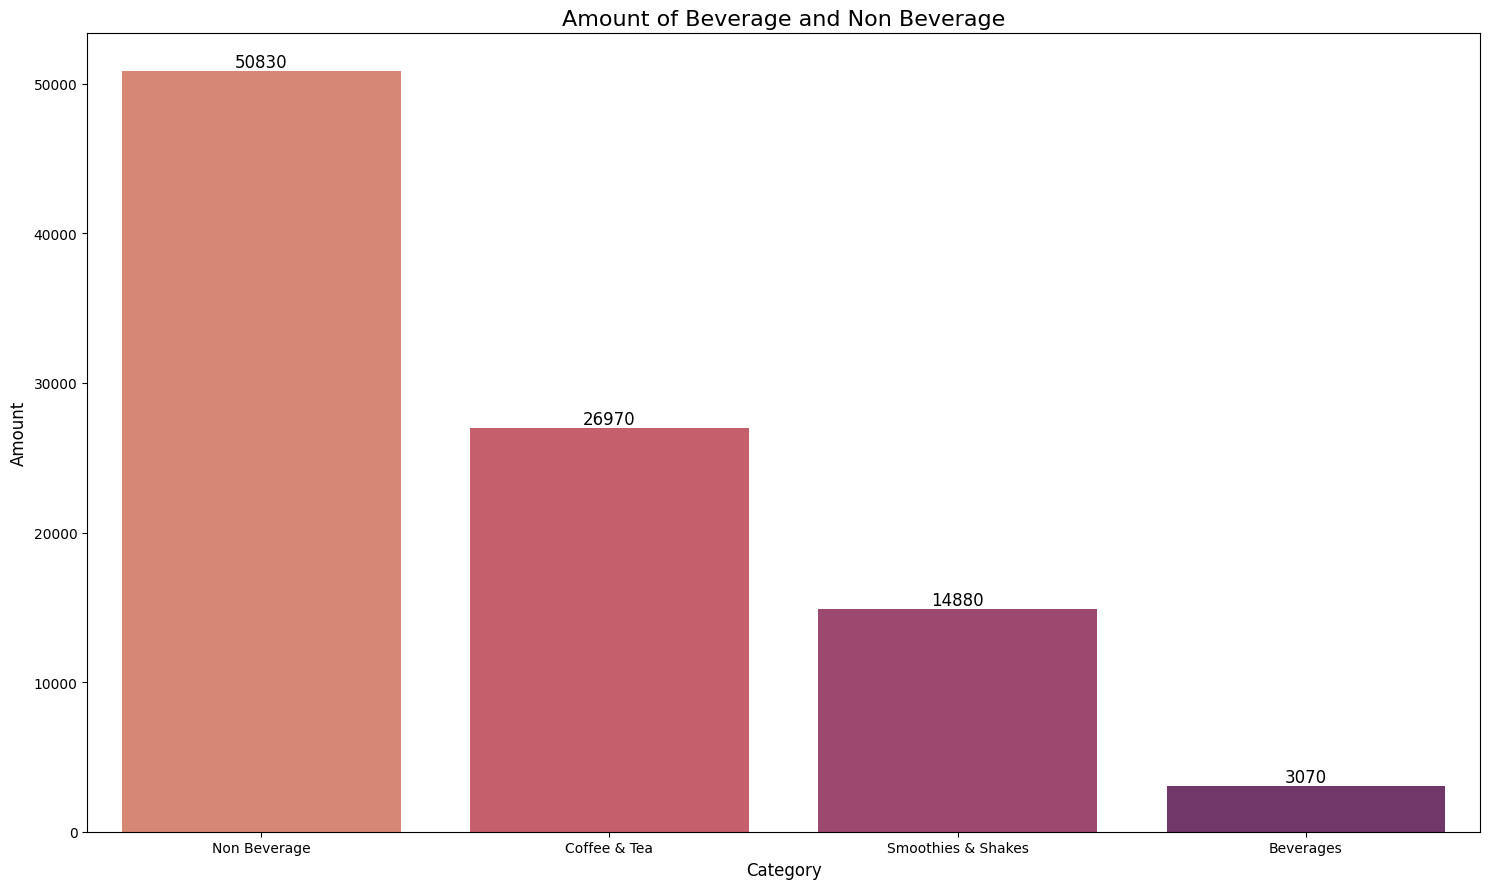

In [14]:
# Menghitung jumlah kalori berdasarkan kategori dari semua menu

sum_bvrg_nonBvrg = [cat_smoothshak['Calories'].sum(axis=0), cat_bvg['Calories'].sum(axis=0), cat_cofftea['Calories'].sum(axis=0), sum_non_beverage]

index_sum_bvrg_nonBvrg = ['Smoothies & Shakes', 'Beverages', 'Coffee & Tea', 'Non Beverage']

sum_data_bvrg_nonBvrg = pd.DataFrame({'Contribute Beverage and Non Beverage': sum_bvrg_nonBvrg}, index=index_sum_bvrg_nonBvrg).sort_values(by='Contribute Beverage and Non Beverage', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(
    x=sum_data_bvrg_nonBvrg.index,
    y=sum_data_bvrg_nonBvrg['Contribute Beverage and Non Beverage'],
    palette='flare'
)

# Tambahkan judul dan label
plt.title('Amount of Beverage and Non Beverage', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Amount', fontsize=12)

# Tambahkan nilai di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height + 0.5),
                ha='center', va='bottom', fontsize=12, color='black')

# # Pangkas batas bawah sumbu Y agar batang tampak lebih berbeda
# min_y = sum_data_bvrg_nonBvrg['Contribute Beverage and Non Beverage'].min()
# max_y = sum_data_bvrg_nonBvrg['Contribute Beverage and Non Beverage'].max()
# plt.ylim(min_y - 5, max_y + 5)

plt.tight_layout()
plt.show()

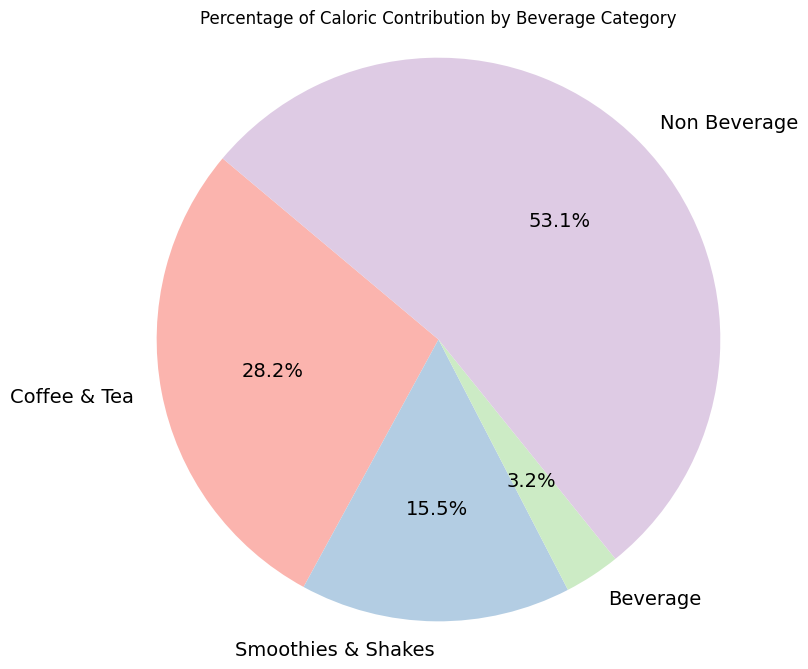

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(contri_bvrg['Contribute Beverage'],
        labels=contri_bvrg.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors,
        textprops={'fontsize': 14})

plt.title('Percentage of Caloric Contribution by Beverage Category')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()

c. Does ordered grilled chicken of crispy increase sandwich's nutritional value?

In [16]:
sandwich_data = data[data['Item'].str.contains('Sandwich')]
sandwich_data = sandwich_data.iloc[:,[1,6,8,11,13,15,17,20,21,22,23]]
sandwich_data['Total Daily Value'] = sandwich_data.iloc[: , 1:].mean(axis=1)

sandwich_data['Chicken_Type'] = sandwich_data['Item'].str.extract('(Crispy|Grilled)')
# sandwich_data['Item Type'] = sandwich_data['Item'].str.extract('(Classic|Club|Ranch|Bacon|Southern)')
sandwich_data

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Daily Value,Chicken_Type
57,Premium Crispy Chicken Classic Sandwich,33,18,16,41,18,13,4,6,15,20,18.4,Crispy
58,Premium Grilled Chicken Classic Sandwich,13,9,22,34,14,13,4,8,15,20,15.2,Grilled
59,Premium Crispy Chicken Club Sandwich,51,44,29,59,19,14,8,20,30,20,29.4,Crispy
60,Premium Grilled Chicken Club Sandwich,31,36,35,52,15,13,8,20,30,20,26.0,Grilled
61,Premium Crispy Chicken Ranch BLT Sandwich,43,31,24,58,19,13,4,20,15,20,24.7,Crispy
62,Premium Grilled Chicken Ranch BLT Sandwich,23,22,30,51,14,13,4,20,15,20,21.2,Grilled
63,Bacon Clubhouse Crispy Chicken Sandwich,59,51,31,72,22,15,8,25,30,15,32.8,Crispy
64,Bacon Clubhouse Grilled Chicken Sandwich,39,42,37,65,17,15,8,30,30,15,29.8,Grilled
65,Southern Style Crispy Chicken Sandwich,29,15,14,38,14,7,4,2,15,15,15.3,Crispy


C:\Users\seraf\AppData\Local\Temp\ipykernel_5940\3594517781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


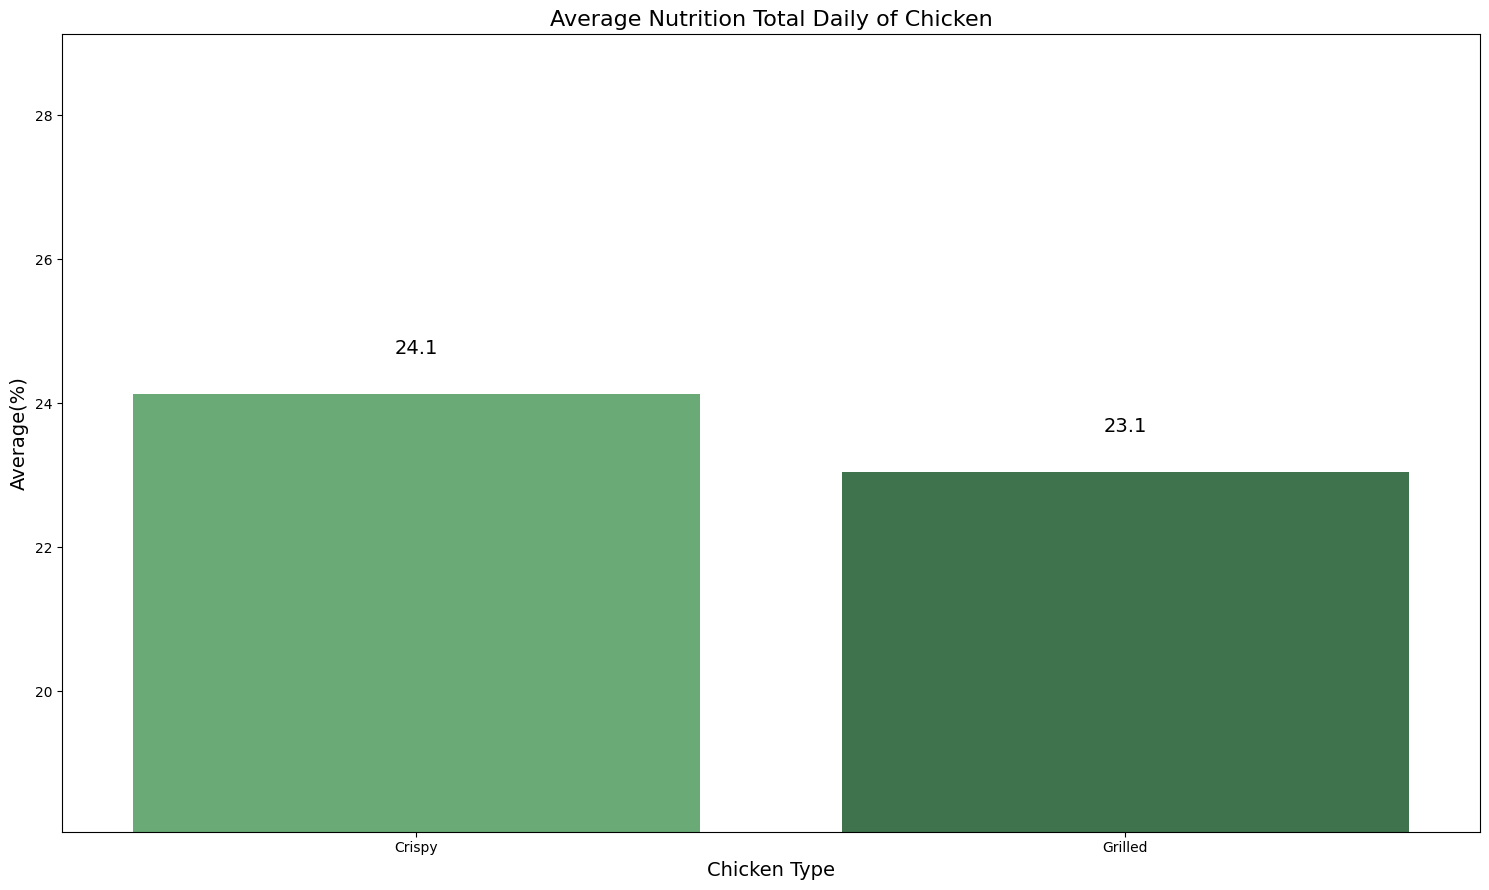

In [17]:
nutrition_avg = [round(sandwich_data.loc[sandwich_data.Chicken_Type == 'Crispy']['Total Daily Value'].mean(axis=0), 2),
                round(sandwich_data.loc[sandwich_data.Chicken_Type == 'Grilled']['Total Daily Value'].mean(axis=0), 2)]

index_average_nutrition = ['Crispy', 'Grilled']

data_nutrition_avg = pd.DataFrame({'Average Nutrition': nutrition_avg}, index=index_average_nutrition).sort_values(by='Average Nutrition', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(
    x=data_nutrition_avg.index,
    y=data_nutrition_avg['Average Nutrition'],
    palette='Greens_d'
)

# Tambahkan judul dan label
plt.title('Average Nutrition Total Daily of Chicken', fontsize=16)
plt.xlabel('Chicken Type', fontsize=14)
plt.ylabel('Average(%)', fontsize=14)

# Tambahkan nilai di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height + 0.5),
                ha='center', va='bottom', fontsize=14, color='black')

# Pangkas batas bawah sumbu Y agar batang tampak lebih berbeda
min_y = data_nutrition_avg['Average Nutrition'].min()
max_y = data_nutrition_avg['Average Nutrition'].max()
plt.ylim(min_y - 5, max_y + 5)

plt.tight_layout()
plt.show()

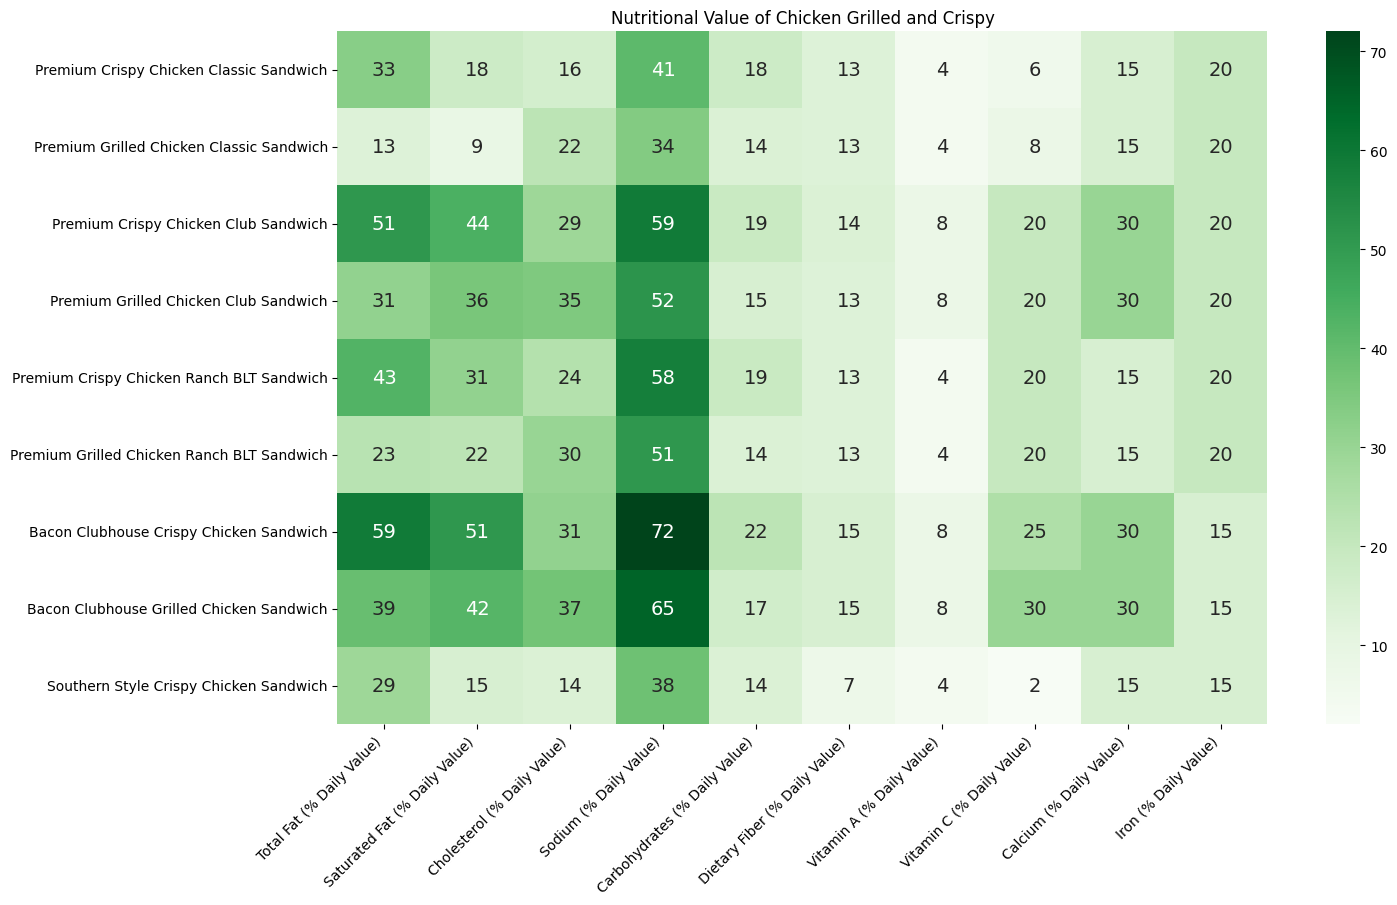

In [18]:
# Visualisasi menggunakan heatmap

plt.figure(figsize=(15, 9))

sns.heatmap(sandwich_data.iloc[:, 1:11], cmap="Greens", annot=True, yticklabels=sandwich_data['Item'], annot_kws={"size": 14})
plt.xticks(rotation=45, ha='right')
plt.title('Nutritional Value of Chicken Grilled and Crispy')
plt.show()

d. What about ordering egg whites instead of whole eggs?

In [19]:
meals_with_egg = data[data['Item'].str.contains('with Egg')]
meals_with_egg = meals_with_egg.iloc[:, [1,6,8,11,13,15,17,20,21,22,23]]
meals_with_egg['Total Daily Value'] = meals_with_egg.iloc[:, 1:].mean(axis=1)
meals_with_egg['Egg_Type'] = meals_with_egg['Item'].str.extract('(Egg Whites)')
meals_with_egg['Egg_Type'] = meals_with_egg['Egg_Type'].fillna('Whole Egg')

meals_with_egg

,Item,Total Fat (% Daily Value),Saturated Fat (% Daily Value),Cholesterol (% Daily Value),Sodium (% Daily Value),Carbohydrates (% Daily Value),Dietary Fiber (% Daily Value),Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Total Daily Value,Egg_Type
3,Sausage McMuffin with Egg,43,52,95,36,10,17,15,0,30,15,31.3,Whole Egg
4,Sausage McMuffin with Egg Whites,35,42,16,37,10,17,6,0,25,10,19.8,Egg Whites
8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",32,56,11,54,12,7,2,8,15,10,20.7,Egg Whites
9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",38,59,11,59,14,12,6,8,15,15,23.7,Egg Whites
12,Sausage Biscuit with Egg (Regular Biscuit),50,71,83,49,12,6,6,0,10,20,30.7,Whole Egg
13,Sausage Biscuit with Egg (Large Biscuit),57,74,83,53,14,11,10,0,10,20,33.2,Whole Egg
14,Sausage Biscuit with Egg Whites (Regular Biscuit),42,62,11,49,11,6,0,0,8,15,20.4,Egg Whites
15,Sausage Biscuit with Egg Whites (Large Biscuit),49,65,11,54,13,11,4,0,8,15,23.0,Egg Whites
20,"Bacon, Egg & Cheese McGriddles with Egg Whites",24,34,11,52,16,9,2,10,15,10,18.3,Egg Whites
23,"Sausage, Egg & Cheese McGriddles with Egg Whites",40,52,17,55,15,9,2,0,20,10,22.0,Egg Whites


C:\Users\seraf\AppData\Local\Temp\ipykernel_5940\580921448.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\seraf\AppData\Local\Temp\ipykernel_5940\580921448.py:11: UserWarning: The palette list has more values (13) than needed (2), which may not be intended.
  ax = sns.barplot(


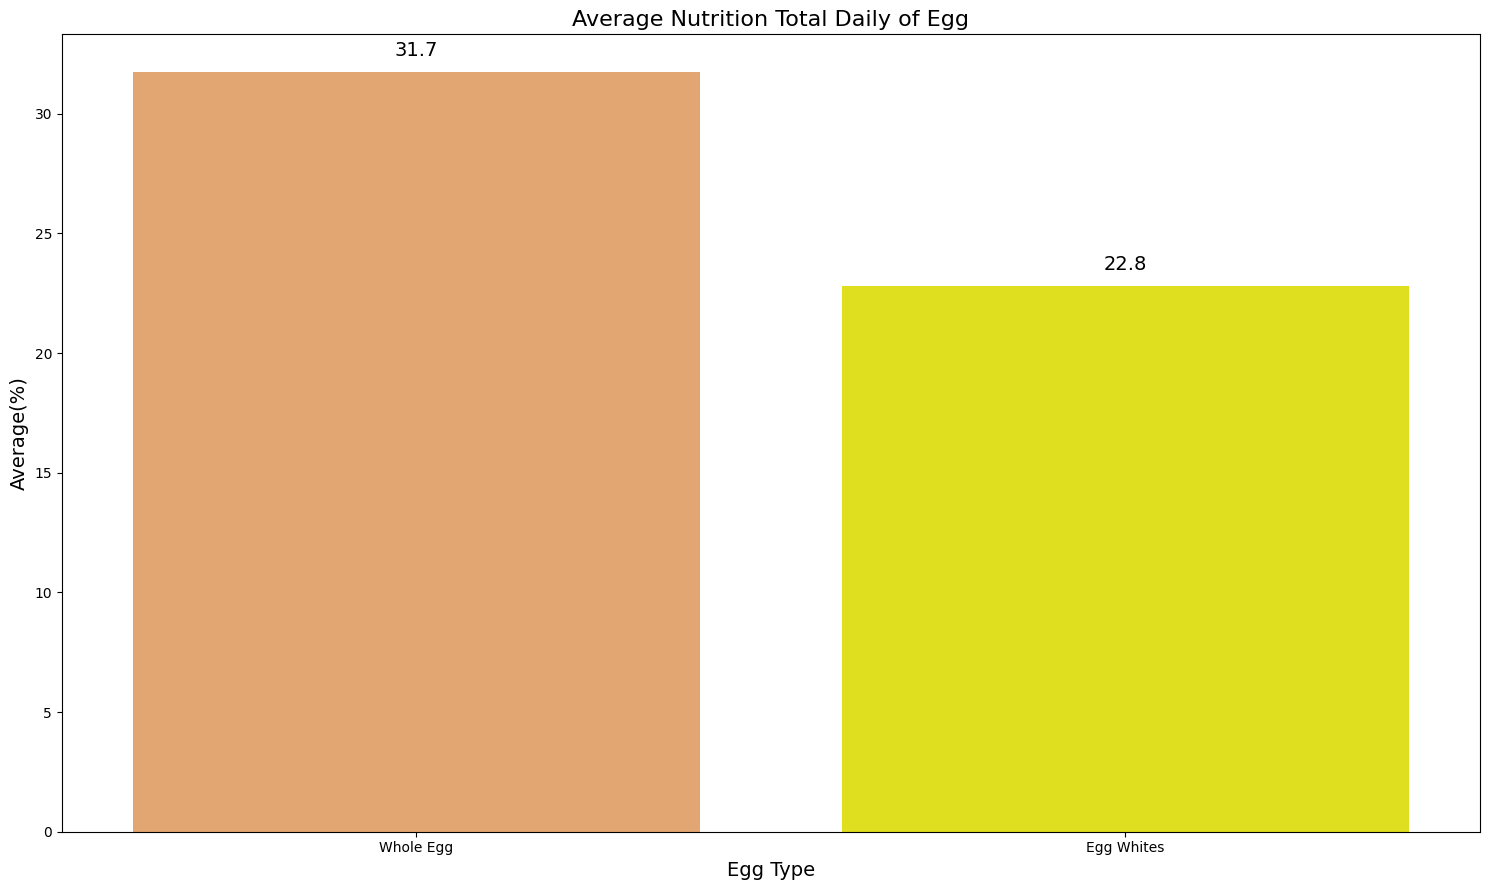

In [20]:
nutrition_avg_egg = [round(meals_with_egg.loc[meals_with_egg.Egg_Type == 'Whole Egg']['Total Daily Value'].mean(axis=0), 2),
                     round(meals_with_egg.loc[meals_with_egg.Egg_Type == 'Egg Whites']['Total Daily Value'].mean(axis=0), 2)]

index_nutrition_avg_egg = ['Whole Egg', 'Egg Whites']

data_nutrition_avg_egg = pd.DataFrame({'Average Nutrition': nutrition_avg_egg}, index=index_nutrition_avg_egg).sort_values(by='Average Nutrition', ascending=False)

plt.figure(figsize=(15, 9))

clrs = ['yellow' if (x=='Egg Whites') else '#F4A460' for x in meals_with_egg['Egg_Type']]
ax = sns.barplot(
    x=data_nutrition_avg_egg.index,
    y=data_nutrition_avg_egg['Average Nutrition'],
    palette=clrs
)

# Tambahkan judul dan label
plt.title('Average Nutrition Total Daily of Egg', fontsize=16)
plt.xlabel('Egg Type', fontsize=14)
plt.ylabel('Average(%)', fontsize=14)

# Tambahkan nilai di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height + 0.5),
                ha='center', va='bottom', fontsize=14, color='black')

# Pangkas batas bawah sumbu Y agar batang tampak lebih berbeda
# min_y = data_nutrition_avg['Average Nutrition'].min()
# max_y = data_nutrition_avg['Average Nutrition'].max()
# plt.ylim(min_y - 5, max_y + 5)

plt.tight_layout()
plt.show()

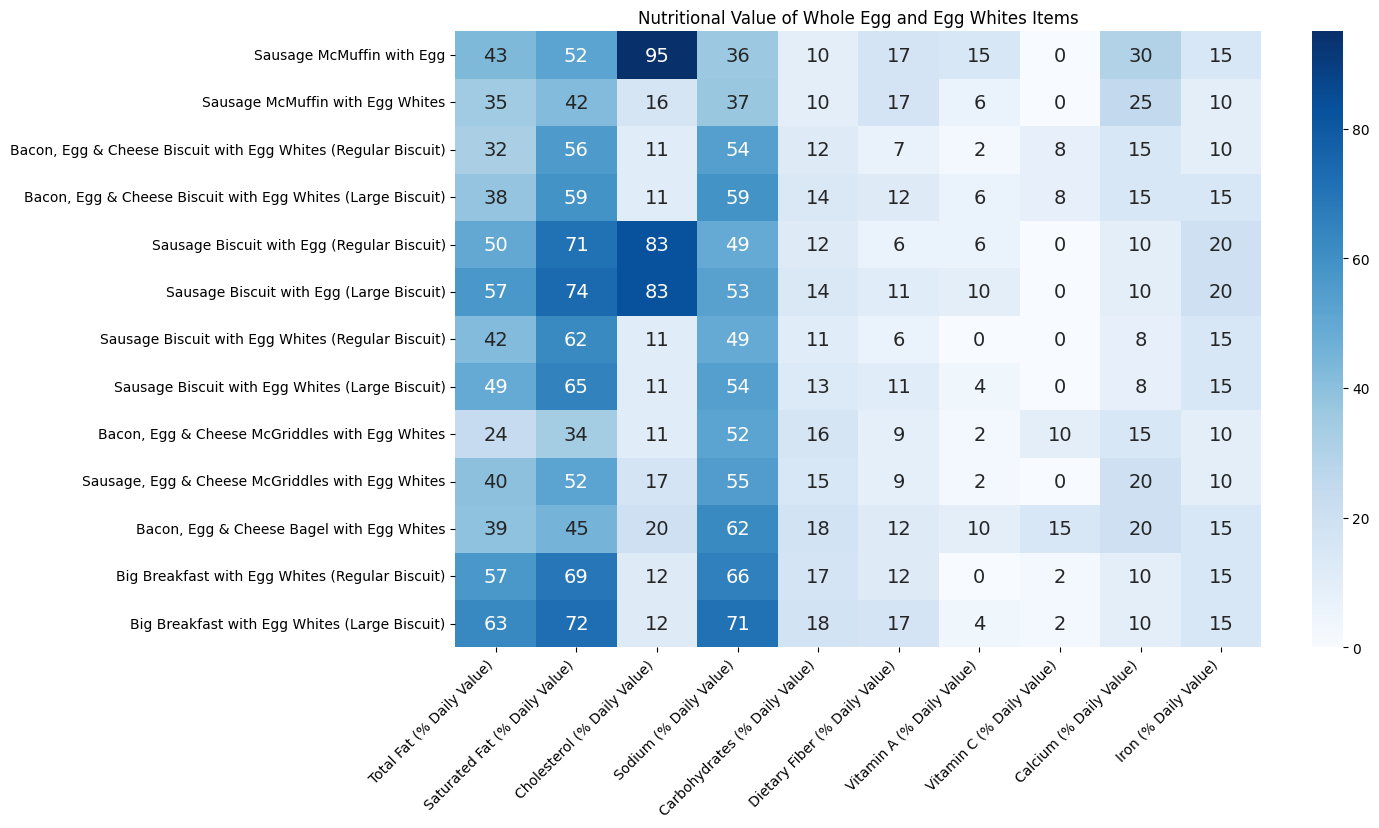

In [21]:
plt.figure(figsize=(13,8))
sns.heatmap(meals_with_egg.iloc[:,1:11], cmap='Blues', annot=True,
            yticklabels=meals_with_egg['Item'], annot_kws={"size": 14})
plt.title('Nutritional Value of Whole Egg and Egg Whites Items')
plt.xticks(rotation=45, ha='right')
plt.show()

e. What is the least number of items could you order from the menu to meet one day's nutritional requirements?

In [25]:
# kebutuhan kalori per hari
min_calories_per_day = 2000
max_calories_per_day = 3000
protein_per_day = 75
fat_per_day = 44
carbohydrate_per_day = 325

# Inisialisasi total kalori dan daftar menu yang dipilih
total_Calories = 0
selected_items_Calories = []

# Inisialisasi total protein dan daftar menu yang dipilih
total_Protein = 0
selected_items_Protein = []

# Inisialisasi total lemak dan daftar menu yang dipilih
total_Fat = 0
selected_items_Fat = []

# Inisialisasi total karbohidrat dan daftar menu yang dipilih
total_Carbohydrates = 0
selected_items_Carbohydrates = []

# Mengambil kategori yang unik dari data menu
Category = data['Category'].unique()

# Mengurutkan item berdasarkan kalori (dari tinggi ke rendah)
sorted_items_calories = data.sort_values(by='Calories', ascending=False)
sorted_items_protein = data.sort_values(by='Protein', ascending=False)
sorted_items_fat = data.sort_values(by='Total Fat', ascending=False)
sorted_items_carbohydrates = data.sort_values(by='Carbohydrates', ascending=False)

# Memilih item hingga total kalori melebihi target
for index, row in sorted_items_calories.iterrows():
    if total_Calories < min_calories_per_day:
        if row['Calories'] < min_calories_per_day and (total_Calories + row['Calories']) < min_calories_per_day:
            if row['Calories'] == 0:
                break
            total_Calories += row['Calories']
            selected_items_Calories.append((row['Item'], row['Calories']))
    else:
        break

# Cetak jumlah,nama menu yang dipilih, dan jumlah kalorinya
print("Total Menu:", len(selected_items_Calories))
print("Menu yang harus dipesan:")
for item in selected_items_Calories:
    print(f"{item[0]}: {item[1]} Calories")

# Memilih item hingga total protein melebihi target
for index, row in sorted_items_protein.iterrows():
    if total_Protein < protein_per_day:
        if row['Protein'] < protein_per_day and (total_Protein + row['Protein']) < protein_per_day:
            if row['Protein'] == 0:
                break
            total_Protein += row['Protein']
            selected_items_Protein.append((row['Item'], row['Protein']))
    else:
        break

# Cetak jumlah,nama menu yang dipilih, dan jumlah proteinnya
print("Total Menu:", len(selected_items_Protein))
print("Menu yang harus dipesan:")
for item in selected_items_Protein:
    print(f"{item[0]}: {item[1]} Gram Protein")

# Memilih item hingga total lemak melebihi target
for index, row in sorted_items_fat.iterrows():
    if total_Fat < fat_per_day:
        if row['Total Fat'] < fat_per_day and (total_Fat + row['Total Fat']) < fat_per_day:
            if row['Total Fat'] == 0:
                break
            total_Fat += row['Total Fat']
            selected_items_Fat.append((row['Item'], row['Total Fat']))
    else:
        break

# Cetak jumlah,nama menu yang dipilih, dan jumlah lemaknya
print("Total Menu:", len(selected_items_Fat))
print("Menu yang harus dipesan:")
for item in selected_items_Fat:
    print(f"{item[0]}: {item[1]} Gram Fat")   

# Memilih item hingga total Karbohidrat melebihi target
for index, row in sorted_items_carbohydrates.iterrows():
    if total_Carbohydrates < carbohydrate_per_day:
        if row['Carbohydrates'] < carbohydrate_per_day and (total_Carbohydrates + row['Carbohydrates']) < carbohydrate_per_day:
            if row['Carbohydrates'] == 0:
                break
            total_Carbohydrates += row['Carbohydrates']
            selected_items_Carbohydrates.append((row['Item'], row['Carbohydrates']))
    else:
        break

# Cetak jumlah,nama menu yang dipilih, dan jumlah lemaknya
print("Total Menu:", len(selected_items_Carbohydrates))
print("Menu yang harus dipesan:")
for item in selected_items_Carbohydrates:
    print(f"{item[0]}: {item[1]} Gram Carbohydrates")  

Total Menu: 2
Menu yang harus dipesan:
Chicken McNuggets (40 piece): 1880 Calories
Kids French Fries: 110 Calories
Total Menu: 2
Menu yang harus dipesan:
Double Quarter Pounder with Cheese: 48 Gram Protein
Big Breakfast with Egg Whites (Large Biscuit): 26 Gram Protein
Total Menu: 2
Menu yang harus dipesan:
Double Quarter Pounder with Cheese: 43.0 Gram Fat
Blueberry Pomegranate Smoothie (Small): 0.5 Gram Fat
Total Menu: 3
Menu yang harus dipesan:
Chocolate Shake (Large): 141 Gram Carbohydrates
Strawberry Shake (Large): 140 Gram Carbohydrates
Bacon Cheddar McChicken: 43 Gram Carbohydrates


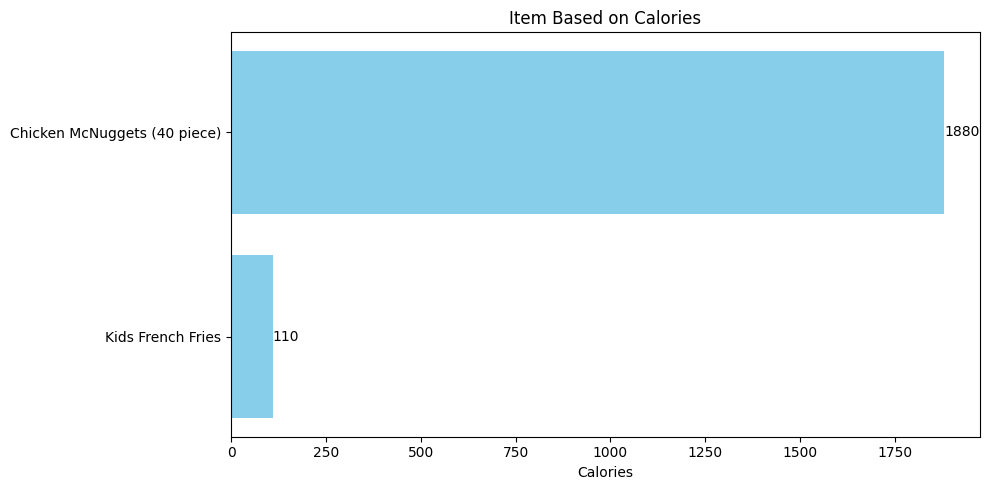

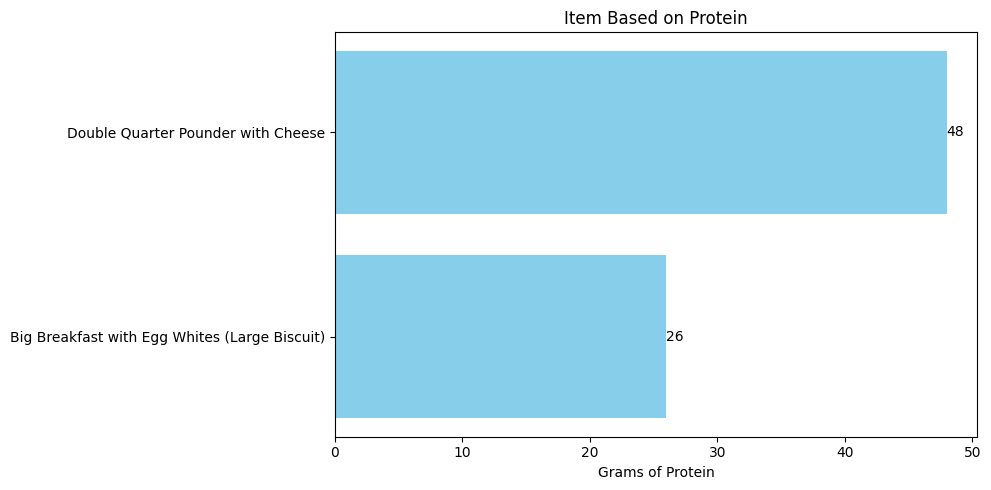

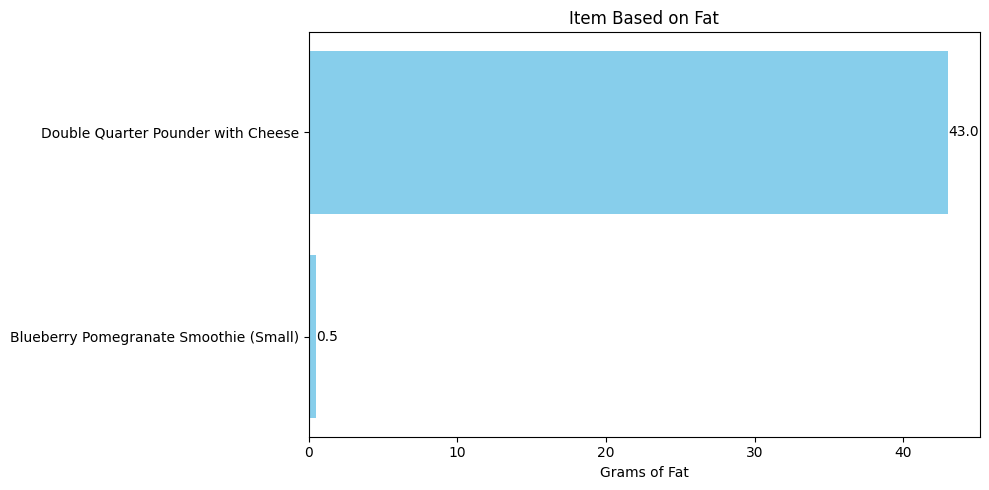

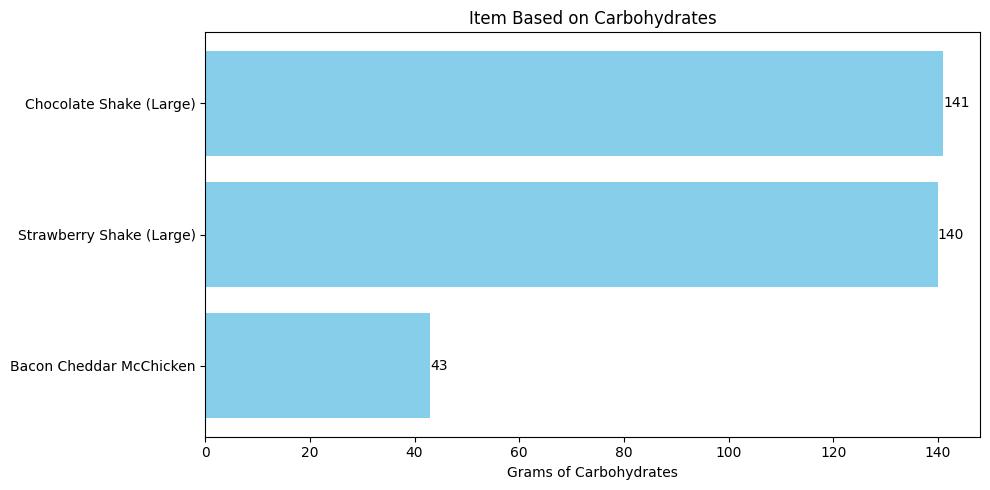

In [27]:
import matplotlib.pyplot as plt

# Data dari output sebelumnya
calories_items = [
    ("Chicken McNuggets (40 piece)", 1880),
    ("Kids French Fries", 110)
]

protein_items = [
    ("Double Quarter Pounder with Cheese", 48),
    ("Big Breakfast with Egg Whites (Large Biscuit)", 26)
]

fat_items = [
    ("Double Quarter Pounder with Cheese", 43),
    ("Blueberry Pomegranate Smoothie (Small)", 0.5)
]

carbohydrates_items = [
    ("Chocolate Shake (Large)", 141),
    ("Strawberry Shake (Large)", 140),
    ("Bacon Cheddar McChicken", 43)
]

# Fungsi untuk membuat barplot horizontal
def plot_bar(items, title, xlabel):
    labels, values = zip(*items)
    plt.figure(figsize=(10, 5))
    bars = plt.barh(labels, values, color='skyblue')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.gca().invert_yaxis()  # Agar item pertama di atas
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')
    plt.tight_layout()
    plt.show()

# Visualisasi untuk masing-masing nutrisi
plot_bar(calories_items, "Item Based on Calories", "Calories")
plot_bar(protein_items, "Item Based on Protein", "Grams of Protein")
plot_bar(fat_items, "Item Based on Fat", "Grams of Fat")
plot_bar(carbohydrates_items, "Item Based on Carbohydrates", "Grams of Carbohydrates")